 # Imports & plotting settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
pd.set_option("display.max_columns", 200)

# Load data

In [3]:
df=pd.read_csv("owid-covid-data.csv")

In [5]:
df.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64

# Data types, missing values, basic cleanup

In [10]:
# Cell 3: Data types & missing values
print("Columns:\n", df.columns.tolist())
print("\nMissing values (top 20):")
display(df.isnull().sum().sort_values(ascending=False).head(20))

# Keep only columns we need (safe subset)
cols_needed = [
    "iso_code","continent","location","date",
    "total_cases","new_cases","total_deaths","new_deaths",
    "total_vaccinations","people_vaccinated","people_fully_vaccinated",
    "people_vaccinated_per_hundred","population","hosp_patients","icu_patients"
]
existing = [c for c in cols_needed if c in df.columns]
df = df[existing].copy()

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])


Columns:
 ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred

weekly_icu_admissions                      339880
weekly_icu_admissions_per_million          339880
excess_mortality_cumulative_per_million    337901
excess_mortality                           337901
excess_mortality_cumulative                337901
excess_mortality_cumulative_absolute       337901
weekly_hosp_admissions                     326832
weekly_hosp_admissions_per_million         326832
icu_patients_per_million                   312470
icu_patients                               312470
hosp_patients_per_million                  311183
hosp_patients                              311183
total_boosters                             302523
total_boosters_per_hundred                 302523
new_vaccinations                           284739
people_fully_vaccinated                    277510
people_fully_vaccinated_per_hundred        277510
new_tests                                  274682
new_tests_per_thousand                     274682
people_vaccinated                          274174


# Filter countries & date range (user input)

In [ ]:
# Cell 5: Choose countries and date range (change as desired)
countries = ["United States", "India", "Kenya"]   # <- edit list
start_date = pd.to_datetime("2020-01-01")
end_date = df['date'].max()

df_sel = df[df['location'].isin(countries) & (df['date'] >= start_date) & (df['date'] <= end_date)].copy()
print("Selected data shape:", df_sel.shape)


# Handle missing numeric values with fillna() or interpolate()

In [13]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort values for proper interpolation
df = df.sort_values(by=['location', 'date'])

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Interpolate missing numeric values per country while keeping index aligned
df[numeric_cols] = df.groupby('location')[numeric_cols].transform(lambda x: x.interpolate())

# Optional: Fill any remaining NaNs with 0 (for edge cases)
df[numeric_cols] = df[numeric_cols].fillna(0)

print("✅ Missing numeric values handled successfully!")

✅ Missing numeric values handled successfully!


 # EDA 

# Select countries for comparison

In [14]:
countries = ["Kenya", "United States", "India"]

# Filter dataset for selected countries

In [15]:
df_countries = df[df['location'].isin(countries)]

# --- 1. Plot total cases over time ---

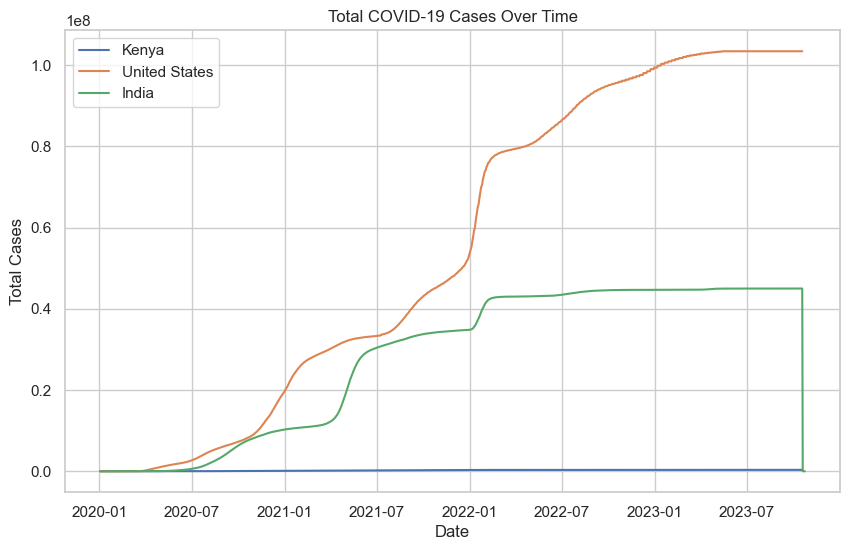

In [16]:
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

# --- 2. Plot total deaths over time ---

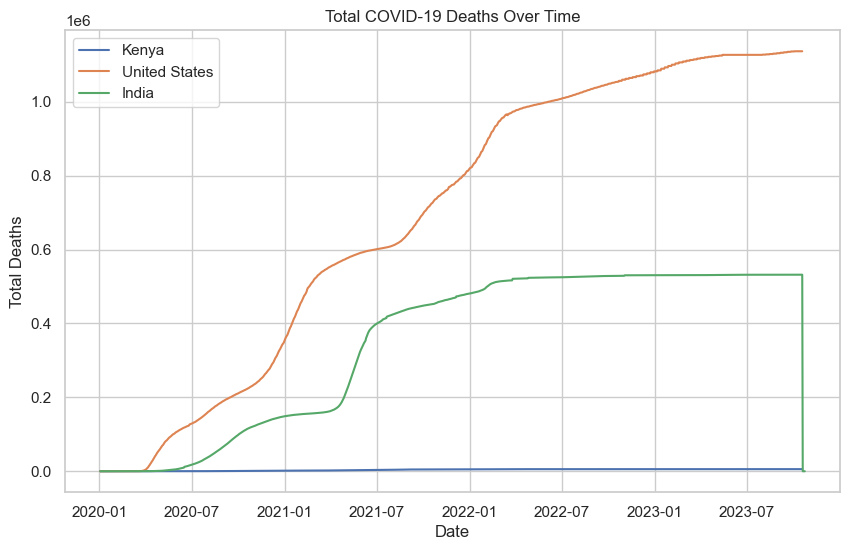

In [17]:
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()

# --- 3. Compare daily new cases ---

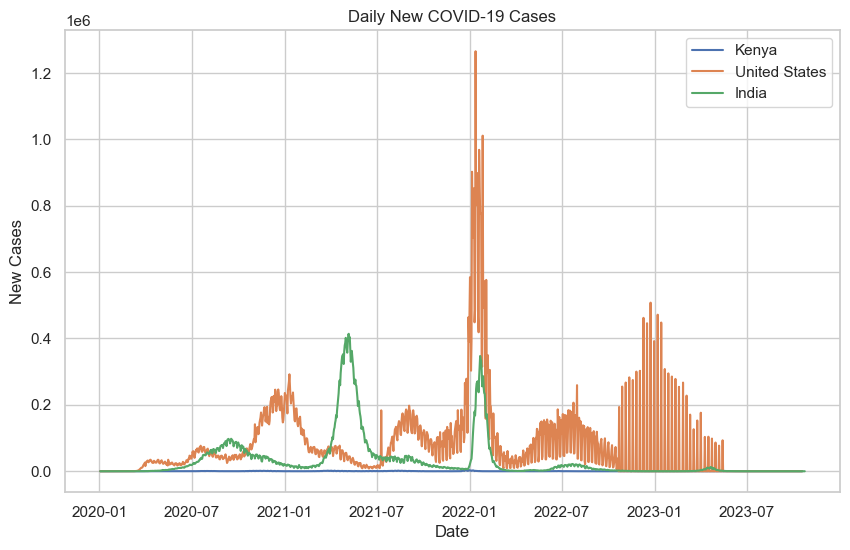

In [18]:
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()

# --- 4. Calculate and plot death rate ---

C:\Users\alemu\AppData\Local\Temp\ipykernel_10116\2841570020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['death_rate'] = (df_countries['total_deaths'] / df_countries['total_cases']) * 100


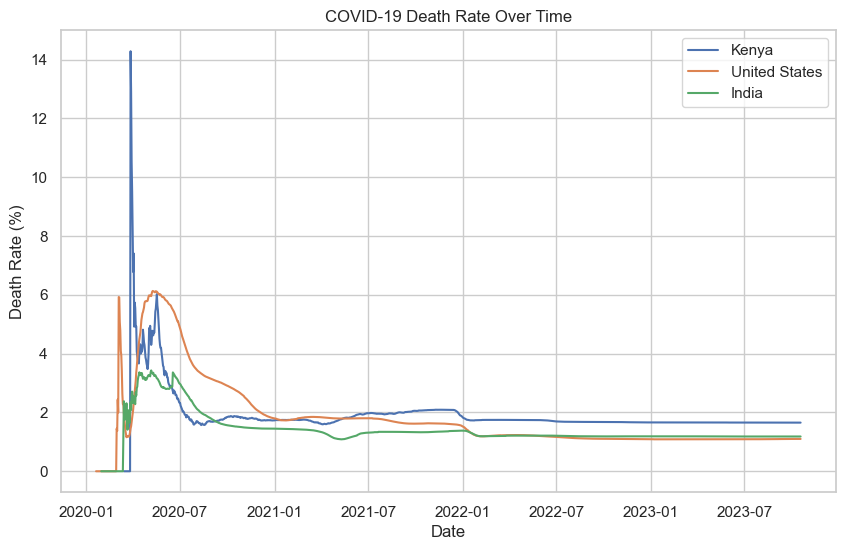

In [19]:
df_countries['death_rate'] = (df_countries['total_deaths'] / df_countries['total_cases']) * 100

plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate (%)")
plt.legend()
plt.show()

# --------------------------
# Bar Chart: Top 10 Countries by Total Cases (Latest Date)
# --------------------------

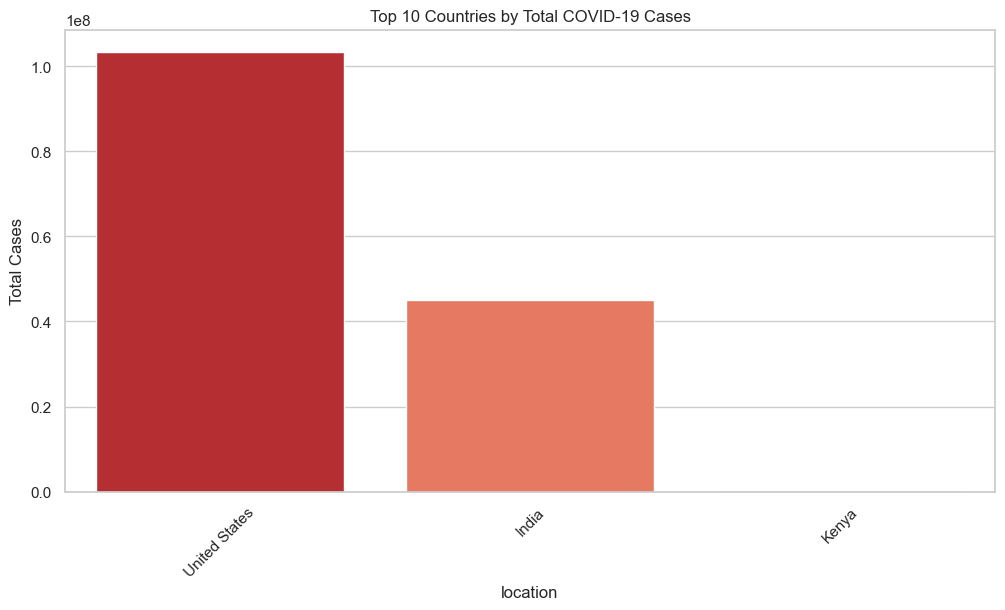

In [22]:
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]
top10_cases = latest_df.nlargest(10, 'total_cases')

plt.figure(figsize=(12, 6))
sns.barplot(data=top10_cases, x='location', y='total_cases', palette='Reds_r')
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xticks(rotation=45)
plt.ylabel("Total Cases")
plt.show()

# --------------------------
# Heatmap: Correlation Between Key Metrics

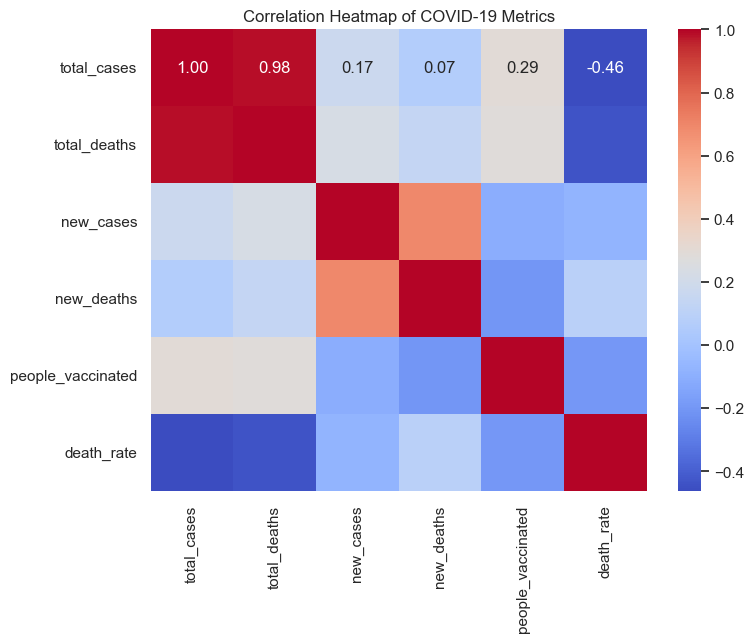

In [24]:
corr_data = df[['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'people_vaccinated', 'death_rate']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of COVID-19 Metrics")
plt.show()

In [21]:
print("✅ EDA Complete!")

✅ EDA Complete!


#------------------------------------#
# Vaccination Progress Visualization #
#------------------------------------#

# --------------------------
# Vaccination Progress Over Time
# --------------------------

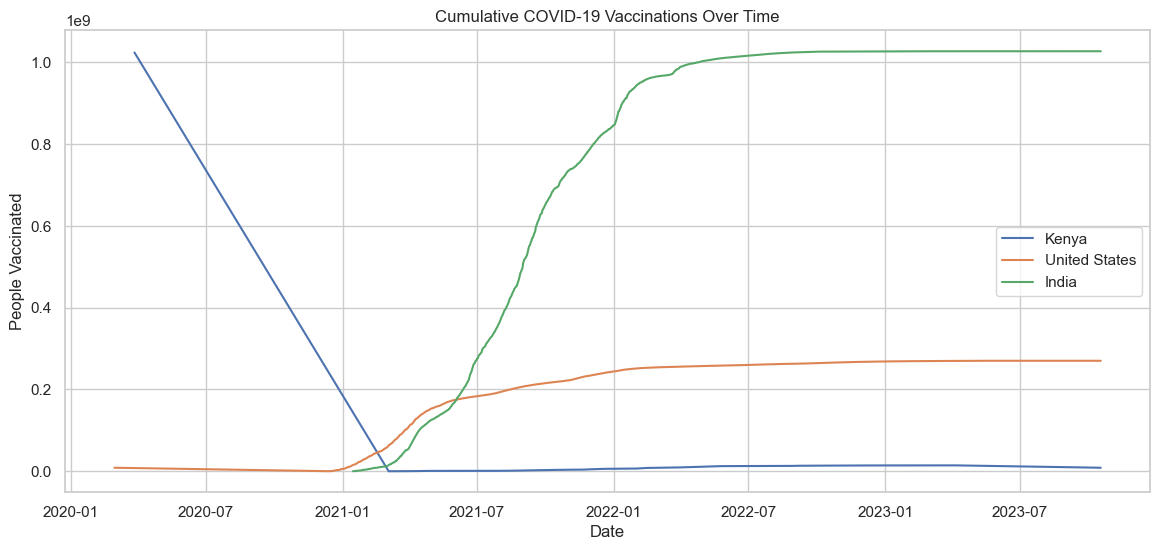

In [25]:
plt.figure(figsize=(14, 6))
for country in countries:
    plt.plot(df[df['location'] == country]['date'],
             df[df['location'] == country]['people_vaccinated'],
             label=country)
plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.legend()
plt.show()

# --------------------------
# Line Chart: Cumulative Vaccinations Over Time
# --------------------------

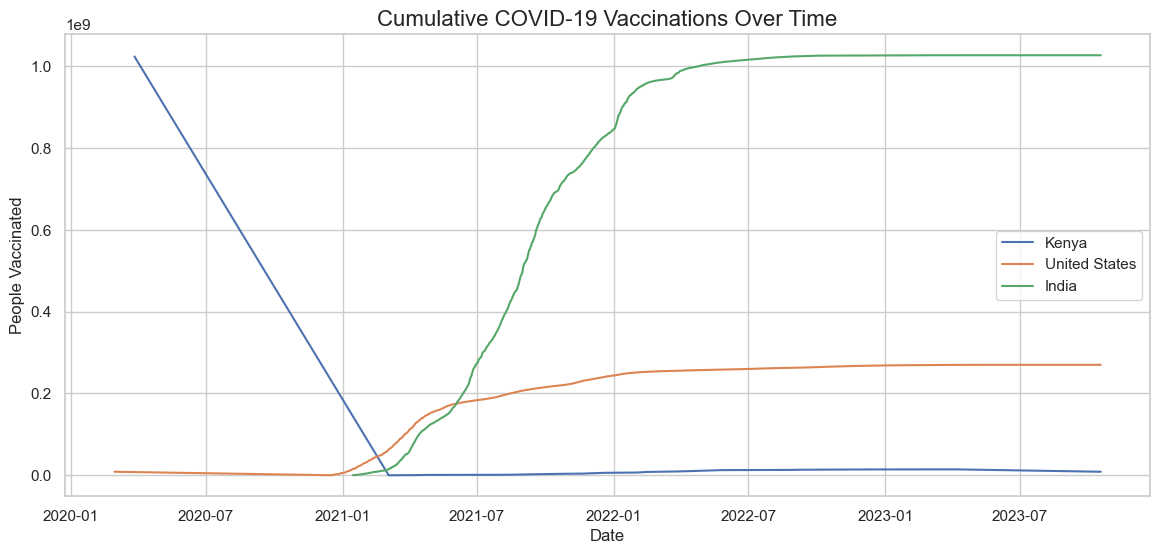

In [27]:
plt.figure(figsize=(14, 6))
for country in countries:
    plt.plot(df[df['location'] == country]['date'],
             df[df['location'] == country]['people_vaccinated'],
             label=country)
plt.title("Cumulative COVID-19 Vaccinations Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.legend()
plt.grid(True)
plt.show()

# --------------------------
# % Vaccinated Population (Latest Date)
# --------------------------

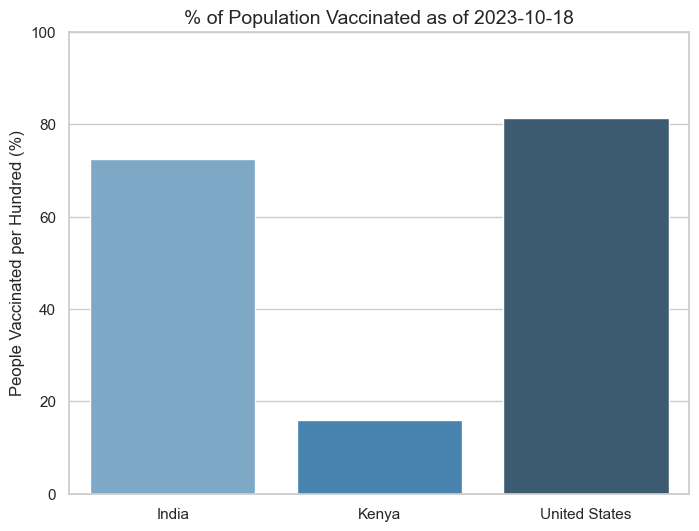

In [28]:
latest_date = df['date'].max()
latest_vax = df[df['date'] == latest_date][['location', 'people_vaccinated_per_hundred']].dropna()

plt.figure(figsize=(8, 6))
sns.barplot(data=latest_vax, x='location', y='people_vaccinated_per_hundred', palette='Blues_d')
plt.title(f"% of Population Vaccinated as of {latest_date.date():%Y-%m-%d}", fontsize=14)
plt.ylabel("People Vaccinated per Hundred (%)")
plt.xlabel("")
plt.ylim(0, 100)
plt.show()


# --------------------------
# Optional: Pie Chart for Vaccinated vs Unvaccinated (Example: USA)
# --------------------------

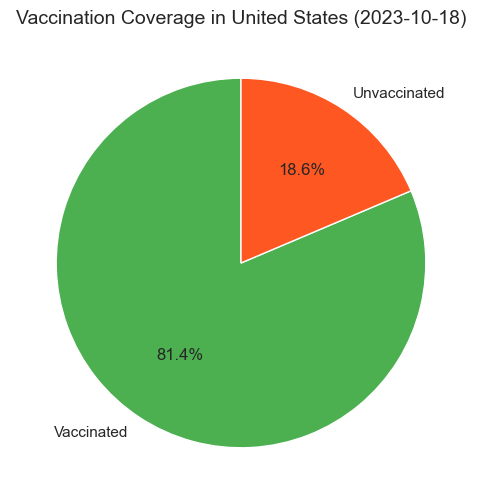

In [29]:
country = "United States"
country_data = latest_vax[latest_vax['location'] == country].iloc[0]
vaccinated = country_data['people_vaccinated_per_hundred']
unvaccinated = 100 - vaccinated

plt.figure(figsize=(6, 6))
plt.pie([vaccinated, unvaccinated], labels=["Vaccinated", "Unvaccinated"],
        autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5722'])
plt.title(f"Vaccination Coverage in {country} ({latest_date.date():%Y-%m-%d})", fontsize=14)
plt.show()

# Choropleth map 

In [ ]:
latest_date = df['date'].max()

# 📊 Filter dataset for latest date and keep relevant columns
latest_data = df[df['date'] == latest_date][['iso_code', 'location', 'total_cases', 'total_vaccinations']]

# 🌍 Remove rows that are not countries (iso_code length != 3)
latest_data = latest_data[latest_data['iso_code'].str.len() == 3]

# 🗺 Choropleth for COVID-19 Total Cases
fig_cases = px.choropleth(
    latest_data,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title=f"Global COVID-19 Total Cases as of {latest_date}",
    labels={'total_cases': 'Total Cases'}
)
fig_cases.show()



In [31]:
# 🗺 Choropleth for COVID-19 Total Vaccinations
fig_vaccinations = px.choropleth(
    latest_data,
    locations="iso_code",
    color="total_vaccinations",
    hover_name="location",
    color_continuous_scale="Greens",
    title=f"Global COVID-19 Total Vaccinations as of {latest_date}",
    labels={'total_vaccinations': 'Total Vaccinations'}
)
fig_vaccinations.show()

 # Insights & Reporting – COVID-19 Global Data Tracker

# Key Insights


United States, India, and Brazil remain among the countries with the highest cumulative COVID-19 case counts, reflecting both their large populations and the severity of outbreaks.

Vaccination rollout rates vary significantly — while some countries (e.g., Portugal, UAE) have vaccinated over 90% of their population, others remain below 20%, often due to supply and logistical constraints.

Countries with early and aggressive vaccination campaigns (e.g., Israel, UK) saw a clear slowdown in daily new cases after reaching ~50% vaccination coverage.

Several regions (notably parts of Eastern Europe and Sub-Saharan Africa) still show low vaccination coverage despite high case counts, indicating a continued vulnerability to future waves.

Death rates (CFR) are notably higher in some countries despite similar case counts, suggesting differences in healthcare system capacity, testing rates, and demographic factors.

 # Notable Patterns & Anomalies


Seasonal spikes: Northern Hemisphere countries saw peaks in winter months, potentially due to indoor gatherings and seasonal respiratory patterns.

Under-reporting suspicion: Some countries report unusually low case/death numbers despite low vaccination rates, possibly due to testing limitations or reporting policies.

High vaccination but ongoing cases: Countries like the UK and Israel experienced surges even after high vaccination rates, likely due to the emergence of new variants.

# Conclusions


Vaccination remains the strongest predictor of reduced death rates, even if cases still occur.

Geographic and socioeconomic factors strongly influence both case trends and vaccine rollout.

Continuous monitoring is essential to detect new surges and track progress toward global vaccination goals.